# Problem Set 3

In [75]:
import numpy as np
from scipy import linalg as la


## QR Decomposition 1

In [76]:
def modGSQR(A):
    """
    QR decomposition via modified Gram-Schmidt procedure
    -------------------
    A: a m x n matrix
        rank n 
    -------------------
    returns:
        Q, R
    """
    m, n = np.shape(A)
    Q = np.copy(A)
    R = np.zeros((n, n))
    for i in range(n):
        R[i][i] = la.norm(Q[:,i])
        Q[:,i] = Q[:,i]/R[i][i]
        for j in range(i + 1, n):
            R[i][j] = np.dot(Q[:,j].T, Q[:,i])
            Q[:,j] = Q[:,j]-R[i][j]*Q[:,i]
    return Q, R

In [77]:
A = np.random.random((6,4))
print(A)


[[ 0.72673846  0.94754628  0.88672265  0.16395977]
 [ 0.73599467  0.58991541  0.61783919  0.73931291]
 [ 0.6275015   0.59463487  0.80496107  0.93249811]
 [ 0.14715324  0.54152295  0.63009673  0.13702066]
 [ 0.0313603   0.8900245   0.38939768  0.04628767]
 [ 0.32464244  0.34538616  0.68974554  0.77394163]]


In [78]:
Q, R = modGSQR(A)
print(Q)
print(R)
print(np.allclose(np.triu(R), R))
print(np.allclose(np.dot(Q.T, Q), np.identity(4)))
print(np.allclose(np.dot(Q, R), A))

[[ 0.57604674  0.16802035 -0.1915085  -0.67993103]
 [ 0.58338364 -0.20819403 -0.36401732  0.28384507]
 [ 0.4973869  -0.08367876  0.19488646  0.37591964]
 [ 0.11664051  0.39186689  0.53376052 -0.3221109 ]
 [ 0.02485763  0.87626531 -0.26633851  0.37915024]
 [ 0.25732671 -0.0046606   0.66105874  0.26134242]]
[[ 1.26159634  1.35990605  1.53227232  1.20585251]
 [ 0.          0.97712468  0.53791398 -0.11375514]
 [ 0.          0.          0.4507284   0.45363777]
 [ 0.          0.          0.          0.62459125]]
True
True
True


In [79]:
Q,R = la.qr(A, mode="economic")
print(Q)
print(R)
print(np.allclose(np.triu(R), R))
print(np.allclose(np.dot(Q.T, Q), np.identity(4)))
print(np.allclose(np.dot(Q, R), A))

[[-0.57604674  0.16802035  0.1915085  -0.67993103]
 [-0.58338364 -0.20819403  0.36401732  0.28384507]
 [-0.4973869  -0.08367876 -0.19488646  0.37591964]
 [-0.11664051  0.39186689 -0.53376052 -0.3221109 ]
 [-0.02485763  0.87626531  0.26633851  0.37915024]
 [-0.25732671 -0.0046606  -0.66105874  0.26134242]]
[[-1.26159634 -1.35990605 -1.53227232 -1.20585251]
 [ 0.          0.97712468  0.53791398 -0.11375514]
 [ 0.          0.         -0.4507284  -0.45363777]
 [ 0.          0.          0.          0.62459125]]
True
True
True


As seen above, the functions runs as desired.

In [80]:
def det(A):
    return abs(modGSQR(A)[1].diagonal().prod())

In [81]:
A = np.random.random((5,5))
print(A)

[[ 0.55729107  0.26040255  0.19607481  0.70735372  0.85719462]
 [ 0.33158029  0.25960441  0.56758831  0.32995309  0.76434679]
 [ 0.79936835  0.77892553  0.78678162  0.15436403  0.15515804]
 [ 0.19452972  0.52834748  0.2350178   0.1720863   0.15971792]
 [ 0.12244645  0.91959577  0.9141627   0.22488774  0.56247711]]


In [82]:
det(A)

0.017735892221953816

In [83]:
la.det(modGSQR(A)[1])

0.017735892221953816

Problem 3:

In [84]:
def solveEqviaQR(A, b):
    """
    Solve for x in Ax = b via QR-decomposition
    -------------------
    A: a n x n matrix
        rank n 
    b: a vector of length n
    -------------------
    returns:
        x
    """
    Q, R = modGSQR(A)
    y = np.dot(Q.T, b)
    
    n = np.size(y)
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.sum(R[i, i+1:] * x[i+1:]))/R[i,i]
    return x.T


In [85]:
A = np.random.random((4,4))
b = np.random.random((4,1))
solveEqviaQR(A, b)

array([  7.95630755, -11.17217476,   6.77255016,  -4.78878371])

In [86]:
la.solve(A,b).T

array([[  7.95630755, -11.17217476,   6.77255016,  -4.78878371]])

The results are as desired.

Problem 4

In [87]:
def householder(A):
    sign = lambda x: 1 if x>=0 else -1
    m, n = np.shape(A)
    R = np.copy(A)
    Q = np.eye(m)
    for k in range(n):
        u = np.copy(R[k:,k])
        u[0] = u[0]+sign(u[0])*la.norm(u)
        u = u/la.norm(u)
        R[k:,k:] += -2*np.outer(u, np.dot(u.T, R[k:,k:]))
        Q[k:,:] += -2*np.outer(u, np.dot(u.T, Q[k:,:]))
    return Q.T, R

In [88]:
A = np.random.random((5, 3))
Q,R = la.qr(A)
print(A.shape, Q.shape, R.shape)
np.allclose(Q.dot(R), A)


(5, 3) (5, 5) (5, 3)


True

In [89]:
A = np.random.random((4,4))
print(A)

[[ 0.01351467  0.50877097  0.77484228  0.77879549]
 [ 0.23474639  0.73495533  0.24812266  0.10771398]
 [ 0.92865787  0.82753479  0.11740343  0.07217505]
 [ 0.26844188  0.24004457  0.41018182  0.15532448]]


In [90]:
Q, R = modGSQR(A)
print(Q)
print(R)
print(np.allclose(np.triu(R), R))
print(np.allclose(np.dot(Q.T, Q), np.identity(4)))
print(np.allclose(np.dot(Q, R), A))

[[ 0.01358444  0.69579644  0.54599855  0.46644224]
 [ 0.2359582   0.69566247 -0.51687843 -0.4395613 ]
 [ 0.93345179 -0.17194686 -0.06689585  0.30761499]
 [ 0.26982763 -0.0485316   0.65593233 -0.7032713 ]]
[[ 0.99486431  1.01756458  0.2893412   0.14527826]
 [ 0.          0.71134012  0.6716482   0.59686729]
 [ 0.          0.          0.55601122  0.46660031]
 [ 0.          0.          0.          0.22888309]]
True
True
True


In [91]:
Q, R = householder(A)
print(Q)
print(R)
print(np.allclose(np.triu(R), R))
print(np.allclose(np.dot(Q.T, Q), np.identity(4)))
print(np.allclose(np.dot(Q, R), A))

[[-0.01358444 -0.69579644  0.54599855  0.46644224]
 [-0.2359582  -0.69566247 -0.51687843 -0.4395613 ]
 [-0.93345179  0.17194686 -0.06689585  0.30761499]
 [-0.26982763  0.0485316   0.65593233 -0.7032713 ]]
[[ -9.94864315e-01  -1.01756458e+00  -2.89341201e-01  -1.45278264e-01]
 [ -2.77555756e-17  -7.11340121e-01  -6.71648198e-01  -5.96867285e-01]
 [ -2.22044605e-16  -1.11022302e-16   5.56011222e-01   4.66600310e-01]
 [ -5.55111512e-17  -5.55111512e-17   5.55111512e-17   2.28883091e-01]]
True
True
True


Despite the occasional difference in sign, (which is acceptable since QR need not be unique), the Householder algorithm works well.

Problem 5

In [92]:
def hessenberg(A):
    sign = lambda x: 1 if x>=0 else -1
    m, n = np.shape(A)
    H = np.copy(A)
    Q = np.eye(m)
    for k in range(n - 2):
        u = np.copy(H[k + 1:,k])
        u[0] = u[0]+sign(u[0])*la.norm(u)
        u = u/la.norm(u)
        H[k+1:,k:] += -2*np.outer(u, np.dot(u.T, H[k+1:,k:]))
        H[:,k+1:] += -2*np.outer(np.dot(H[:,k+1:], u), u.T)
        Q[k+1:,:] += -2*np.outer(u, np.dot(u.T, Q[k+1:,:]))
    return H, Q.T

In [93]:
# Generate a random matrix and get its upper Hessenberg form via SciPy.
A = np.random.random((4,4))
H, Q = la.hessenberg(A, calc_q=True)
print(H)
print(Q)
# Verify that H has all zeros below the first subdiagonal and QHQ^T = A.
print(np.allclose(np.triu(H, -1), H))
print(np.allclose(np.dot(np.dot(Q, H), Q.T), A))


[[ 0.31812125 -0.80047264 -0.08322676 -0.44982217]
 [-0.96796343  0.69532796  0.46945085  0.18531004]
 [ 0.          0.74012416  0.61346843  0.33861937]
 [ 0.          0.          0.12651759 -0.31837596]]
[[ 1.          0.          0.          0.        ]
 [ 0.         -0.27792442 -0.32724131 -0.90314514]
 [ 0.         -0.46287659 -0.77821401  0.42441515]
 [ 0.         -0.84172637  0.53600008  0.06481234]]
True
True


In [94]:
H, Q = hessenberg(A)
print(H)
print(Q)
# Verify that H has all zeros below the first subdiagonal and QHQ^T = A.
print(np.allclose(np.triu(H, -1), H))
print(np.allclose(np.dot(np.dot(Q, H), Q.T), A))

[[  3.18121252e-01  -8.00472643e-01  -8.32267648e-02  -4.49822175e-01]
 [ -9.67963426e-01   6.95327961e-01   4.69450852e-01   1.85310044e-01]
 [ -5.55111512e-17   7.40124155e-01   6.13468434e-01   3.38619372e-01]
 [  0.00000000e+00   0.00000000e+00   1.26517590e-01  -3.18375961e-01]]
[[ 1.          0.          0.          0.        ]
 [ 0.         -0.27792442 -0.32724131 -0.90314514]
 [ 0.         -0.46287659 -0.77821401  0.42441515]
 [ 0.         -0.84172637  0.53600008  0.06481234]]
True
True


The matrices are the same.

## QR Decomposition 2

Problem 1

In [95]:
def LSviaQR(A, b):
    """
    Least Squares solution via QR decomposition
    -------------------
    A: a m x n matrix
        rank n 
    b: a vector of length n
    -------------------
    returns:
        x
    """
    Q, R = modGSQR(A) 
    y = np.dot(Q.T, b)
    x = la.solve_triangular(R, y)
    return x

In [96]:

A = np.random.random((4,4))
b = np.random.random((4,1))

Problem 2

[[   0.      0.5     1.      1.5     2.      2.5     3.      3.5     4.
     4.5     5.      5.5     6.      6.5     7.      7.5     8.      8.5
     9.      9.5    10.     10.5    11.     11.5    12.     12.5    13.
    13.5    14.     14.5    15.     15.5    16.  ]
 [ 136.86  142.7   146.53  152.65  156.08  163.71  168.12  176.16  182.12
   193.75  201.04  214.33  219.4   224.39  223.85  223.79  211.57  203.97
   193.75  193.51  187.84  187.59  177.82  181.29  178.66  188.22  190.87
   203.11  203.56  212.7   214.26  224.9   226.51]]


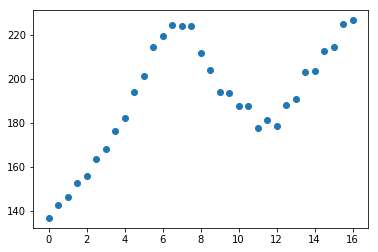

In [97]:
from matplotlib import pyplot as plt
housing = np.load("housing.npy")
print(housing.T)
plt.scatter(housing.T[0], housing.T[1])
plt.show()

In [98]:
# Construct A

years = housing.T[0]
A = np.vstack([years, np.ones(len(years))]).T


print(A)

[[  0.    1. ]
 [  0.5   1. ]
 [  1.    1. ]
 [  1.5   1. ]
 [  2.    1. ]
 [  2.5   1. ]
 [  3.    1. ]
 [  3.5   1. ]
 [  4.    1. ]
 [  4.5   1. ]
 [  5.    1. ]
 [  5.5   1. ]
 [  6.    1. ]
 [  6.5   1. ]
 [  7.    1. ]
 [  7.5   1. ]
 [  8.    1. ]
 [  8.5   1. ]
 [  9.    1. ]
 [  9.5   1. ]
 [ 10.    1. ]
 [ 10.5   1. ]
 [ 11.    1. ]
 [ 11.5   1. ]
 [ 12.    1. ]
 [ 12.5   1. ]
 [ 13.    1. ]
 [ 13.5   1. ]
 [ 14.    1. ]
 [ 14.5   1. ]
 [ 15.    1. ]
 [ 15.5   1. ]
 [ 16.    1. ]]


In [99]:
prices = housing.T[1]
b = prices.T
print(b)

[ 136.86  142.7   146.53  152.65  156.08  163.71  168.12  176.16  182.12
  193.75  201.04  214.33  219.4   224.39  223.85  223.79  211.57  203.97
  193.75  193.51  187.84  187.59  177.82  181.29  178.66  188.22  190.87
  203.11  203.56  212.7   214.26  224.9   226.51]


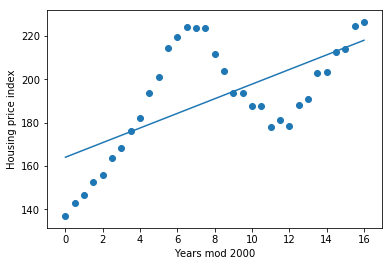

In [100]:
x = LSviaQR(A, b)
m, n = x
plt.plot(years, m*years + n )
plt.scatter(years, prices)
plt.xlabel("Years mod 2000")
plt.ylabel("Housing price index")

plt.show()

Problem 3

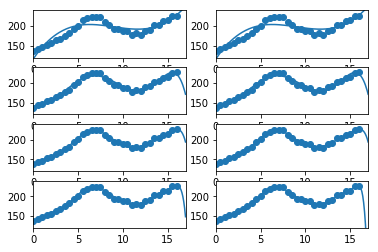

In [101]:

degrees = [3,6,9, 12]
for j in range(len(degrees)):
    plt.subplot(len(degrees),2,2*j + 1)
    i = degrees[j]
    A = np.vander(years, i + 1)
    coeffs = la.lstsq(A, b)[0]
    x = np.linspace(0,17,171)
    A = np.vander( x , i + 1)
    y = np.dot(np.vander(x, i + 1), coeffs).T
    #y.describe()
    #p = lambda x: np.dot(np.vander(x, i + 1)[0], coeffs)
    plt.plot(x, y)
    plt.scatter(years, prices)
    plt.xlim(0, 17)
    plt.ylim(120, 240)
    
    coeffspoly = np.polyfit(years, prices, i)
    y = np.dot(np.vander(x, i + 1), coeffspoly).T
    plt.subplot(len(degrees),2,2*j + 2)
    plt.plot(x, y)
    plt.scatter(years, prices)
    plt.xlim(0, 17)
    plt.ylim(120, 240)
    
    
    #print(coeffs)
    #print(np.vander( [0.8], i + 1)[0])
    #print(np.dot(np.vander([0.8], i + 1)[0], coeffs))
plt.show()

# which is barely distinguishable

Nicer comparison frame:

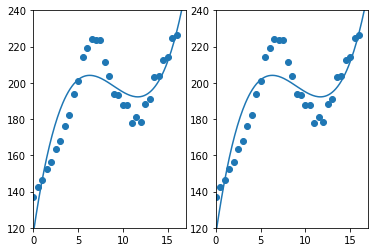

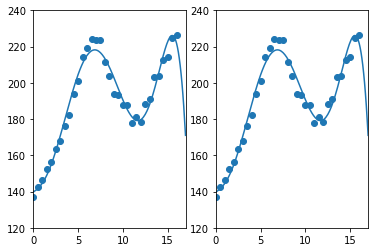

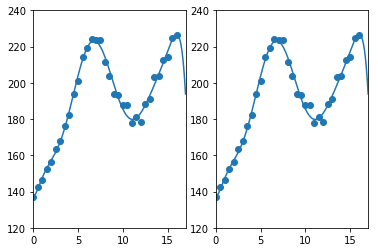

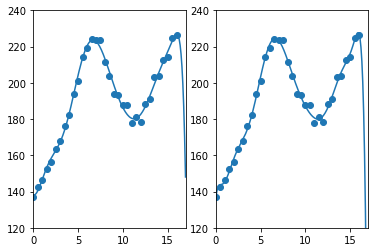

In [102]:
degrees = [3,6,9, 12]
for j in range(len(degrees)):
    i = degrees[j]
    plt.title('Polynomial fit comparison, n = ' + str(i))
    plt.subplot(1,2, 1)
    A = np.vander(years, i + 1)
    coeffs = la.lstsq(A, b)[0]
    x = np.linspace(0,17,171)
    A = np.vander( x , i + 1)
    y = np.dot(np.vander(x, i + 1), coeffs).T
    #y.describe()
    #p = lambda x: np.dot(np.vander(x, i + 1)[0], coeffs)
    plt.plot(x, y)
    plt.scatter(years, prices)
    plt.xlim(0, 17)
    plt.ylim(120, 240)
    
    coeffspoly = np.polyfit(years, prices, i)
    y = np.dot(np.vander(x, i + 1), coeffspoly).T
    plt.subplot(1,2,2)
    plt.plot(x, y)
    plt.scatter(years, prices)
    plt.xlim(0, 17)
    plt.ylim(120, 240)
    
    plt.show()
    
    #print(coeffs)
    #print(np.vander( [0.8], i + 1)[0])
    #print(np.dot(np.vander([0.8], i + 1)[0], coeffs))


Bigger graphs

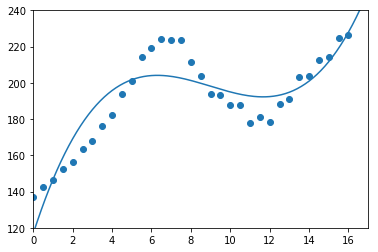

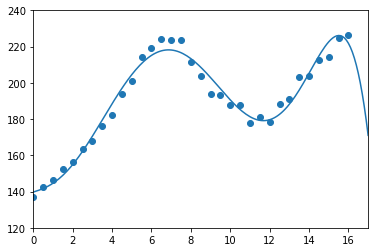

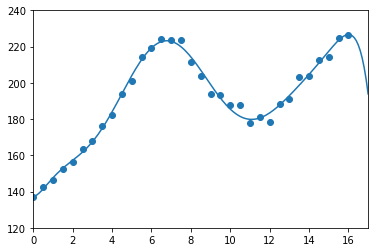

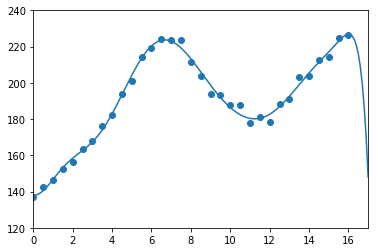

In [103]:
degrees = [3,6,9, 12]
for j in range(len(degrees)):
    i = degrees[j]
    A = np.vander(years, i + 1)
    coeffs = la.lstsq(A, b)[0]
    x = np.linspace(0,17,171)
    A = np.vander( x , i + 1)
    y = np.dot(np.vander(x, i + 1), coeffs).T

    plt.plot(x, y)
    plt.scatter(years, prices)
    plt.xlim(0, 17)
    plt.ylim(120, 240)
    plt.show()


Problem 4

In [104]:
def plot_ellipse(a, b, c, d, e):
    """Plot an ellipse of the form ax^2 + bx + cxy + dy + ey^2 = 1."""
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A))/(2*A)
    plt.plot(r*cos_t, r*sin_t, lw=2)
    plt.gca().set_aspect("equal", "datalim")

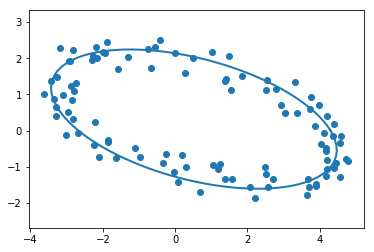

'print(np.random.random((1, len(x))))\nxt = x.T + 30*(np.random.random((1, len(x)))[0]-0.5)\nx = xt.T\nA = np.column_stack((x**2, x, x*y, y, y**2))\nprint(A.shape)\nb = np.ones(len(x))\na, b, c, d, e = la.lstsq(A, b)[0]\n\n\nplt.scatter(x,y)\nplot_ellipse(a, b, c, d, e)\nplt.show()\n'

In [105]:
ellipsedata = np.load("ellipse.npy")
x, y = ellipsedata.T
A = np.column_stack((x**2, x, x*y, y, y**2))
#print(A.shape)
b = np.ones(len(x))
#print(la.lstsq(A, b)[0])
a, b, c, d, e = la.lstsq(A, b)[0]


plt.scatter(x,y)
plot_ellipse(a, b, c, d, e)
plt.show()

"""print(np.random.random((1, len(x))))
xt = x.T + 30*(np.random.random((1, len(x)))[0]-0.5)
x = xt.T
A = np.column_stack((x**2, x, x*y, y, y**2))
print(A.shape)
b = np.ones(len(x))
a, b, c, d, e = la.lstsq(A, b)[0]


plt.scatter(x,y)
plot_ellipse(a, b, c, d, e)
plt.show()
"""


Problem 5

In [106]:
def power(A, N, tol):
    """
    power method to find dominant eigenvalue 
    and corresponding eigenvector
    -------------------
    A:
        a n x n matrix, full rank
    N: 
        maximum number of iterations
    tol: 
        tolerance for convergence
    -------------------
    returns:
        eigenvalue, eigenvector
    """
    m, n = np.shape(A)
    v = np.random.rand(n)
    xm1 = v/la.norm(v)
    k = 1
    dist = tol + 1
    while (k<=N and dist > tol):
        x = np.dot(A,xm1)
        x = x/la.norm(x)
        dist = np.linalg.norm(x-xm1)
        xm1 = x
        k+=1
    return np.dot(x.T, np.dot(A,x)), x

In [107]:
A = np.array([[1, 0,0],[0,3,0],[0,0,-1]])
#np.random.random((3, 3))
power(A, 100000 , 1e-12)

(3.0, array([  1.03395682e-13,   1.00000000e+00,  -1.86864971e-13]))

In [108]:
A = np.random.random((10,10))
# Compute the eigenvalues and eigenvectors of A via SciPy.
eigs, vecs = la.eig(A)
# Get the dominant eigenvalue and eigenvector of A.
# The eigenvector of the kth eigenvalue is the kth column of 'vecs'.
loc = np.argmax(eigs)
lamb, x = eigs[loc], vecs[:,loc]
# Verify that Ax = lambda x.
print(np.allclose(A.dot(x), lamb*x))


# My code
lamb, x = power(A, 100000 , 1e-12)
# Verify that Ax = lambda x.
np.allclose(A.dot(x), lamb*x)

True


True

Problem 6

In [109]:
from cmath import sqrt

def evalsviaQR(A, N, tol):
    """
    function to find eigenvalues of A
    via QR decomposition with Hessenberg pre-conditioning
    -------------------
    A:
        a n x n matrix, full rank
    N: 
        maximum number of iterations
    tol: 
        tolerance for convergence
    -------------------
    returns:
        eigenvalues of A
    """
    m, n = np.shape(A)
    S = la.hessenberg(A)
    k = 0
    for i in  range(N):
        Q, R = la.qr(S)
        S = np.dot(R,Q)
    eigs = []
    i = 0
    while i < n-1:
        if abs(S[i+1,i]) < tol:
            eigs.append(S[i][i])
        else:
            eigp = 0.5*(a+d + sqrt((a+d)**2+4*b*c))
            eigs.append(eigp)
            eigm = 0.5*(a+d - sqrt((a+d)**2+4*b*c))
            eigs.append(eigm)
            i += 1
        i += 1
    eigs.append(S[n-1][n-1])
    return eigs

In [110]:
A = np.random.random((4, 4))
A = (A + A.T)/2
A = [[1,0,0],[0,2,2],[0,2,-2]]
print(np.dot(A, [3, 1, 2]))
#print(evalsviaQR(A, 10000, 1e-8))
print(la.eig(A))
print(la.eig(A)[1])
print(la.eig(A)[1].T[:2])

[ 3  6 -2]
(array([-2.82842712+0.j,  2.82842712+0.j,  1.00000000+0.j]), array([[ 0.        ,  0.        ,  1.        ],
       [ 0.38268343, -0.92387953,  0.        ],
       [-0.92387953, -0.38268343,  0.        ]]))
[[ 0.          0.          1.        ]
 [ 0.38268343 -0.92387953  0.        ]
 [-0.92387953 -0.38268343  0.        ]]
[[ 0.          0.38268343 -0.92387953]
 [ 0.         -0.92387953 -0.38268343]]


The calculated eigenvalues are the same in both methods.

# The SVD and Image Compression

Problem 1

In [111]:
from math import sqrt
import numpy as np



def truncated_svd(A, k = None):
    m,n = np.shape(A)
    evals, evecs = la.eig(np.dot(np.conjugate(A).T, A))
    ind = evals.argsort()[::-1]
    evals = evals[ind]
    evecs = evecs[ind]
    
    for i in range(len(evals) -1, -1, -1):
        if evals[i] == 0:
            evals = np.delete(evals, i)
            evecs = np.delete(evecs, i)
        else:
            break
                  
    r = len(evals)
    
    if k == None:
        k = r
        
    evals = evals[:k]
    evecs = evecs.T[:k]

    svals = np.ones(k)
    for i in range(k):
        svals[i] = sqrt(evals[i]) 
              
    
    U = np.zeros((m,r))   
    Sigma = np.zeros((r, r))
    V = np.zeros((n,r))

    for i in range (0, r):
        V[:,i] = evecs[i]
        Sigma[i,i] = svals[i]
        U[:,i] = (1 / svals[i]) * np.dot(A, evecs[i]) 
    return U, Sigma, V 

A = np.random.random((10,8))

U, Sigma, V = truncated_svd(A)

np.allclose(np.dot(np.dot(U , Sigma ), V.T), A)

/Users/Jan/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:30: ComplexWarning: Casting complex values to real discards the imaginary part


True

In [112]:
a = np.array([1,3,4,0,3,0,2,0,0])
a[::-1]

array([0, 0, 2, 0, 3, 0, 4, 3, 1])

Problem 2

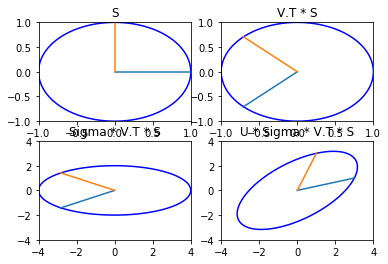

In [114]:
from matplotlib import pyplot as plt
import pylab

A = np.array([[3,1],[1,3]])
U, Sigma, V = la.svd(A)
Sigma = np.diag(Sigma)

theta = np.linspace(0, 2*np.pi, 400)
x = np.cos(theta)
y = np.sin(theta)
S = np.vstack([x,y])



t = np.linspace(0, 1, 100)
exx = t
exy = 0*t
ex = np.vstack([exx, exy])

eyx = 0*t
eyy = t
ey = np.vstack([eyx, eyy])


xplot = np.linspace(0,1,20)
yplot = np.zeros_like(xplot)
first = np.vstack((xplot, yplot))

yplot1 = np.linspace(0,1,20)
xplot1 = np.zeros_like(yplot1)
second = np.vstack((xplot1, yplot1))
 
# S
plt.subplot(221)
plt.plot(x,y, c = "b")
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.plot(exx, exy)
plt.plot(eyx, eyy)
plt.title("S")

# V^H * S
plt.subplot(222)
VTS = np.dot(V.T, S)
x = VTS[0,:]
y = VTS[1,:]
plt.plot(x,y, c = "b")
plt.xlim([-1, 1])
plt.ylim([-1, 1])
VTex = np.dot(V.T, ex)
VTey = np.dot(V.T, ey)
plt.plot(VTex[0,:],VTex[1,:])
plt.plot(VTey[0,:],VTey[1,:])
plt.title("V.T * S")

# Sigma * V^H * S
plt.subplot(223)
SigVTS = np.dot(Sigma, VTS)
x = SigVTS[0,:]
y = SigVTS[1,:]
plt.plot(x,y, c = "b")
SigVTex = np.dot(Sigma, VTex)
SigVTey = np.dot(Sigma, VTey)
plt.plot(SigVTex[0,:],SigVTex[1,:])
plt.plot(SigVTey[0,:],SigVTey[1,:])
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.title("Sigma * V.T * S")

# U * Sigma * V^H * S
plt.subplot(224)
USigVTS = np.dot(U, SigVTS)
x = USigVTS[0,:]
y = USigVTS[1,:]
plt.plot(x,y, c = "b")
USigVTex = np.dot(U, SigVTex)
USigVTey = np.dot(U, SigVTey)
plt.plot(USigVTex[0,:],USigVTex[1,:])
plt.plot(USigVTey[0,:],USigVTey[1,:])
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.title("U * Sigma * V.T * S")

plt.show()

Problem 3

In [115]:
def svd_approx(A, k):
    U, Sigma, V = la.svd(A, full_matrices=False)
    for i in range(k,len(Sigma)):
        Sigma[i] = 0
    Sigma = np.diag(Sigma) 
    SigV = np.dot(Sigma, V)
    A_k = np.dot(U, SigV)    
    return A_k

A = np.diag([2,3,5,0.4, 0.04, 0.01, 0.1, 1])
svd_approx(A, 5)

array([[ 2. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  3. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  5. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0.4,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ]])

Problem 4

In [116]:
def lowest_rank_approx(A, e):
    U, Sigma, V = la.svd(A, full_matrices=False)
    for i in range(len(Sigma)):
        if Sigma[i] < e:
            Sigma[i] = 0
    return np.dot(U, np.dot(np.diag(Sigma), V.T))
            

In [117]:
A = np.diag([2,3,5,0.4, 0.04, 0.01])

In [118]:
lowest_rank_approx(A, 0.02)

array([[ 2.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  3.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  5.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.4 ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.04,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

Problem 5:

In [119]:
def compress_img(filename, k):
    X = plt.imread(filename).astype(float)
    
    R = X[:,:,0]/255
    G = X[:,:,1]/255
    B = X[:,:,2]/255
    
    R = svd_approx(R,k)
    G = svd_approx(G,k)
    B = svd_approx(B,k)
    
    for i in [R, G, B]:
        for val in i:
            ind1 = (val < 0)
            val[ind1] = 0
            ind2 = (val > 1)
            val[ind2] = 1
    
    plt.subplot(121)
    plt.title("Original Image")
    X = X/255
    plt.imshow(X)
    
    plt.subplot(122)
    plt.title("Rank "+ str(k) + " Approximation")
    m, n = R.shape
    print(m,n)
    approx = np.zeros((m,n,3))
    approx[:,:,0] = R
    approx[:,:,1] = G
    approx[:,:,2] = B
    
    plt.imshow(approx)
    plt.show()

1158 1041


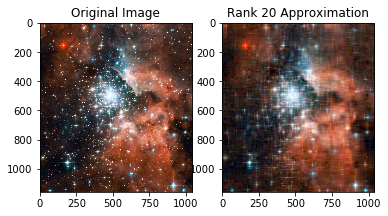

In [121]:
compress_img('hubble.jpg',20)

999 1776


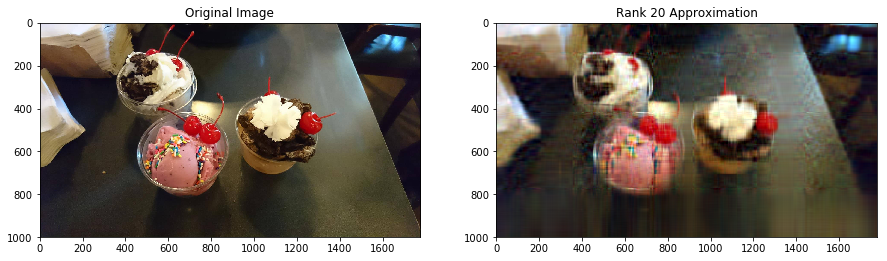

In [551]:
compress_img('icecream.jpg',20)

3366 5984


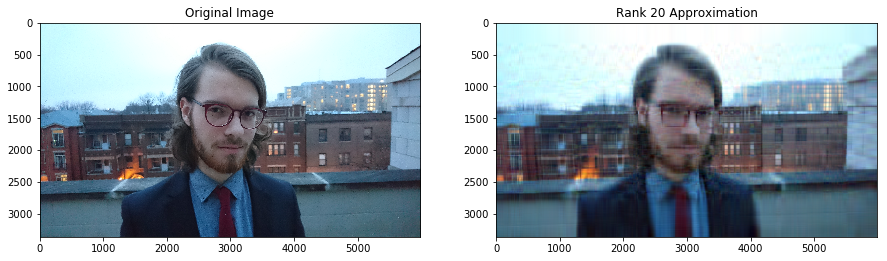

In [552]:
compress_img('Portrait.jpg',20)

The approximation makes my glasses rectangular, so it must work correctly.


# The Drazin Inverse

In [ ]:
Problem 1

In [26]:
import numpy as np
from scipy import linalg as la
import math

def checkDrazin(A, k, AD):

    if np.allclose(np.dot(A,AD), np.dot(AD, A)) == False:
        return False
    
    if np.allclose( np.dot(np.linalg.matrix_power(A, k+1), AD), np.linalg.matrix_power(A, k) ) == False:
        return False
    
    if np.allclose(np.dot(np.dot(AD, A) , AD), AD) == False:    
        return False
    
    return True

A = np.array(([1,3,0,0],[0,1,3,0],[0,0,1,3],[0,0,0,0]))
AD = np.array(([1,-3,9,81],[0,1,-3,-18],[0,0,1,3],[0,0,0,0]))
print(checkDrazin(A, 1, AD))

B = np.array(([1,1,3],[5,2,6],[-2,-1,-3]))
BD = np.zeros((3,3))
print(checkDrazin(B, 3, BD))


True
True


In [18]:
A = np.array(([1,3,0,0],[0,1,3,0],[0,0,1,3],[0,0,0,0]))
AD = np.array(([1,-3,9,81],[0,1,-3,-18],[0,0,1,3],[0,0,0,0]))
checkDrazin(A, 1, AD)

True

In [19]:
B = np.array(([1,1,3],[5,2,6],[-2,-1,-3]))
BD = np.zeros((3,3))
checkDrazin(B, 3, BD)

True

Problem 2

In [30]:
def drazin(A, tol):
    
    n, n = np.shape(A)
    f = lambda x: abs(x) > tol
    Q1, S, k1 = la.schur(A, sort = f)
    #print(Q1, S, k1)
    g = lambda x: abs(x) <= tol
    Q2, T, k2 = la.schur(A, sort = g)
    #print(Q2, T, k2)
    U = np.hstack((S[:,:k1],T[:,:(n-k1)]))
    Uinv = la.inv(U)
    V = np.dot(np.dot(Uinv, A), U)
    Z = np.zeros((n,n))
    if k1 != 0:
        Minv = la.inv(V[:k1,:k1])
        Z[:k1,:k1] = Minv
    return np.dot(np.dot(U, Z), Uinv)


In [31]:
AD = drazin(A, 0.01)

checkDrazin(A, 1, AD)

True

Problem 3

In [50]:
# From wikipedia, the Laplacian matrix of a simple graph is defined as L = D - A,
# where D is the degree matrix and A is the adjacency matrix.
# The degree matrix of a graph is a diagonal matrix 
# with the number of edges connected to i in the ith spot of the diagonal.


def effResistance(A):
    degrees = np.sum(A, 0)
    D = np.diag(degrees)
    L = D - A
    
    n = np.shape(A)[0]
    I = np.identity((n))
    R = np.zeros((n,n))
    for j in range (0, n):
        Lj = np.copy(L)
        Lj[j,:] = I[j,:]
        LjD = drazin(Lj, 0.001)
        for i in range (0, n):
            if i != j: 
                R[i,j] = LjD[i,i]
    return R


Test cases

In [51]:
A1 = np.array(([0,1,0,0],[1,0,1,0],[0,1,0,1],[0,0,1,0],))
R1 = effResistance(A1)
np.allclose(3, R1[0,3])

True

In [52]:
A2 = np.array(([0,1,1],[1,0,1],[1,1,0]))
R2 = effResistance(A2)
np.allclose(2/3, R2[0,1])

True

In [53]:
A3 = np.array(([0,2],[2,0]))
R3 = effResistance(A3)
np.allclose(1/2, R3[0,1])

True

In [54]:
A4 = np.array(([0,1],[1,0]))
R4 = effResistance(A4)
np.allclose(1, R4[0,1])

True

In [55]:
A5 = np.array(([0,3],[3,0]))
R5 = effResistance(A5)
np.allclose(1/3, R5[0,1])

True

In [56]:
A6 = np.array(([0,4],[4,0]))
R6 = effResistance(A6)
np.allclose(1/4, R6[0,1])

True

Problem 4 & 5

In [216]:
import pandas as pd

class LinkPredictor:
    
    def __init__(self, filename):
        links = pd.read_csv(filename,header=None).as_matrix()
        m, n = links.shape
        
        names, index = np.unique(links, return_inverse=True)
        self.names = names
        
        index = index.reshape((m,n))
        self.len = len(names)
        A = np.zeros((self.len,self.len))
        print(type(A))
        for i in range(m):
            A[index[i, 0], index[i, 1]] = 1
            A[index[i, 1], index[i, 0]] = 1
        self.adj = A
        
        R = effResistance(A)
        self.res = R
      
    
    def predict_link(self, node = None):
    
        if node == None:
            adjc = np.copy(self.adj)
            resc = np.copy(self.res)
            new = resc +5*adjc + 5*np.diag(np.ones(self.len))
            ij_min = np.unravel_index(new.argmin(), new.shape)
            return (self.names[ij_min[0]],self.names[ij_min[1]])
        
        else: 
            if node in self.names:
                ind = np.where(self.names==node)[0][0]
                adjc = np.copy(self.adj)
                resc = np.copy(self.res)
                new = resc +5*adjc + 5*np.diag(np.ones(self.len))
                new = new[:,ind]
                j_min = np.unravel_index(new.argmin(), new.shape)
                #print(j_min)
                return self.names[j_min[0]]
                
            else:
                raise ValueError("There is no person with this name in the network.")
                
                
                
    def add_link(self, name1, name2):
        
        if name1 in self.names and name2 in self.names:
            ind1 = np.where(self.names==name1)[0][0]
            ind2 = np.where(self.names==name2)[0][0]
            
            self.adj[ind1,ind2] = self.adj[ind1,ind2]+1
            self.adj[ind2,ind1] = self.adj[ind2,ind1]+1
            self.res = effResistance(self.adj)
            
        else:
            raise ValueError("At least one of the suggested people is not part of the network.")

        
N = LinkPredictor('social_network.csv')
N.predict_link()

<class 'numpy.ndarray'>


('Oliver', 'Emily')

In [217]:
N.predict_link('Melanie')

'Carol'

In [218]:
N.predict_link('Alan')


'Sonia'

In [219]:
N.add_link('Alan','Sonia')
N.predict_link('Alan')

'Piers'

In [220]:
N.add_link('Alan','Piers')
N.predict_link('Alan')

'Abigail'

The class works as desired.

In [221]:
N.names
res = N.res[:5,:5]
res

array([[ 0.        ,  0.420422  ,  0.75202581,  0.29449423,  0.8248995 ],
       [ 0.420422  ,  0.        ,  0.78568304,  0.47948939,  0.86706154],
       [ 0.75202581,  0.78568304,  0.        ,  0.80164338,  1.08845304],
       [ 0.29449423,  0.47948939,  0.80164338,  0.        ,  0.87021247],
       [ 0.8248995 ,  0.86706154,  1.08845304,  0.87021247,  0.        ]])

 # QuantEcon: Need for Speed

In [222]:
import matplotlib.pyplot as plt
import numpy as np
from numba import jit

p, q = 0.1, 0.2

def compute_series(n):
    x = np.empty(n, dtype=int)
    x[0] = 1  # Start in state 1
    U = np.random.uniform(0, 1, size=n)
    for t in range(1, n):
        current_x = x[t-1]
        if current_x == 0:
            x[t] = U[t] < p
        else:
            x[t] = U[t] > q
    return x

In [223]:
n = 100000
x = compute_series(n)
print(np.mean(x == 0))

0.66376


In [224]:
%timeit compute_series(n)

10 loops, best of 3: 77.8 ms per loop


In [225]:
compute_series_numba = jit(compute_series)

In [226]:
x = compute_series_numba(n)
print(np.mean(x == 0))

0.66467


In [227]:
%timeit compute_series_numba(n)

100 loops, best of 3: 1.46 ms per loop


Cython

In [236]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [239]:
%%cython
import numpy as np
from numpy cimport int_t, float_t

def compute_series_cy(int n):
    # == Create NumPy arrays first == #
    x_np = np.empty(n, dtype=int)
    U_np = np.random.uniform(0, 1, size=n)
    # == Now create memoryviews of the arrays == #
    cdef int_t [:] x = x_np
    cdef float_t [:] U = U_np
    # == Other variable declarations == #
    cdef float p = 0.1
    cdef float q = 0.2
    cdef int t
    # == Main loop == #
    x[0] = 1
    for t in range(1, n):
        current_x = x[t-1]
        if current_x == 0:
            x[t] = U[t] < p
        else:
            x[t] = U[t] > q
    return np.asarray(x)

In [241]:
compute_series_cy(10)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [243]:
x = compute_series_cy(n)
print(np.mean(x == 0))

0.6667


In [244]:
%timeit compute_series_cy(n)

100 loops, best of 3: 2.23 ms per loop


We can see that both numba and python significantly improve the speed, and numba more so than cython.